# Проектная работа

# Введение:

<br>Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.<br>
<br>Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.<br>
<br>Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.<br>
<br>Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.<br>
<br>Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет.<br>
<br>**Моя задача — провести анализ и подготовить план действий по удержанию клиентов.**<br>

А именно:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
<br> 1) выделить целевые группы клиентов;<br>
<br> 2) предложить меры по снижению оттока;<br>
<br> 3) определить другие особенности взаимодействия с клиентами.<br>

# Описание данных

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

<br>Данные клиента за предыдущий до проверки факта оттока месяц:<br>
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

<br>Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:<br>
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.

Путь к файлу: /datasets/gym_churn.csv

### Шаг. Загрузим данные

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
# import scipy.stats as stats
# import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# from sklearn.linear_model import Lasso, Ridge
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from plotly import graph_objects as go

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


Исправим названия столбцов - приведем их к нижнему регистру

In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Данные загружены, названия столбцов в порядке, можно переходить к следующеу шагу

### Шаг. Проведем исследовательский анализ данных (EDA)

#### Изучение датасета, средние значения и стандартные отклонения

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Пропусков в данных нет. Для оптимизации датасета поменяем некоторые типы на "int" и "bool"

In [5]:
#df[['gender','near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']] = \
 #           df[['gender','near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']].astype('bool')

In [6]:
df['month_to_end_contract'].value_counts()

1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: month_to_end_contract, dtype: int64

Все значения столбца 'month_to_end_contract' целочисенные, поэтому поменяем тип на 'int'

In [7]:
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [8]:
df.sample(6)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
558,0,1,1,0,1,1,0,30,12.507382,1,2,2.815155,2.694309,0
3909,1,1,1,0,1,6,0,34,138.626778,5,7,2.003375,2.081668,0
1969,0,1,1,0,1,12,0,28,159.544387,9,5,1.063843,1.107245,0
913,0,1,0,0,1,6,0,27,172.585412,6,4,1.835403,1.869669,0
229,1,1,0,0,1,1,0,36,146.181557,1,5,3.853884,3.818110,0
71,0,1,1,1,1,12,0,26,174.978054,11,0,1.061644,1.027229,0


Все типы данных приведены коректно. Теперь проверим на всякий случай дубликаты:

In [9]:
df.duplicated().sum()

0

С дубликатами все хорошо (их нет)

In [10]:
#Посмотрим разброс данных, средние значения и стандартные отклонения
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Данные равномерные, стандартные отклонения не очень далеко от средних, а также не похоже, что есть выбросы.

#### Средние значения признаков в двух группах — ушедшие / оставшиеся

In [11]:
df.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


В оттоке у нас наблюдается картина, в которой пол не влияет значения, это клиенты, которые чаще живут не в непосредственной близости к клубу, пришедшие не по партнерской скидочной программе, которые реже посещают групповые занятия, в среднем занимаются около месяца.

Предварительно можно сделать предположение, что клиенты в оттоке это те, кто живут чаще не очень близко, пришли попробовать позаниматься в клубе, посмотреть понравится ли, взяли пробный абонемент на месяц, не имели каких-либо предложений по скидкам/партнерским программам. По каким-то причинам их что-то не устроило или они нашли более выгодные и удобные варианты.



#### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

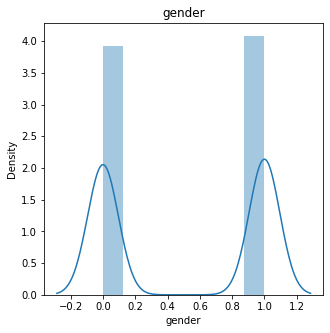

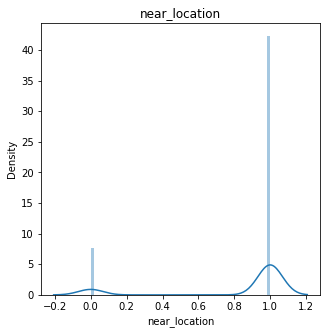

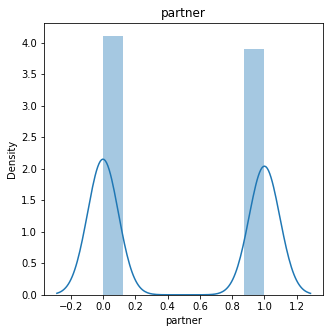

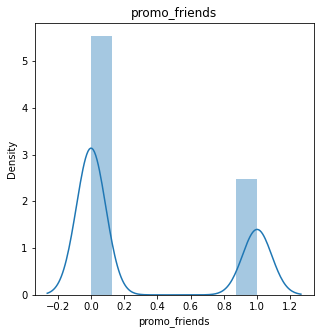

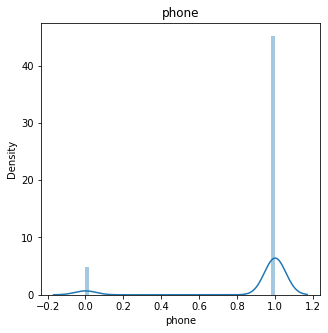

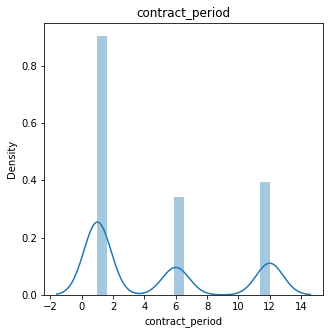

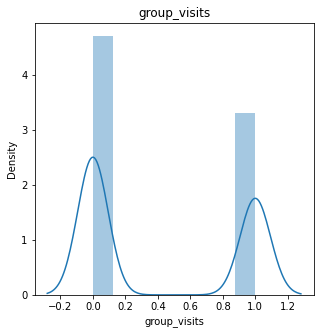

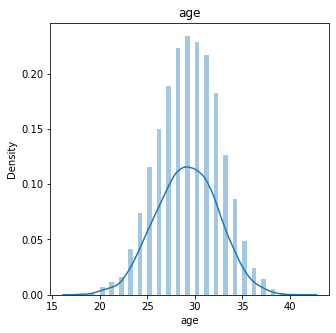

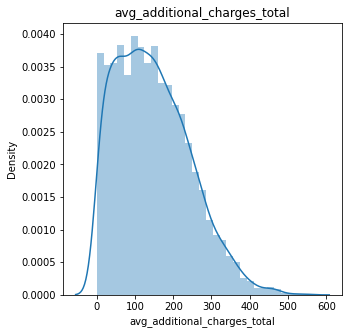

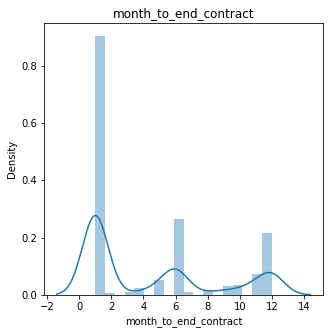

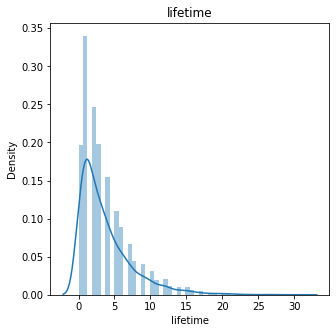

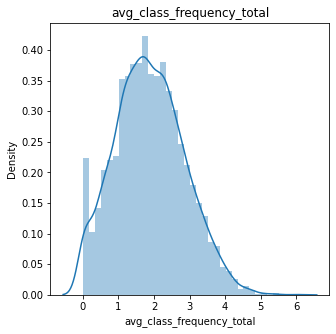

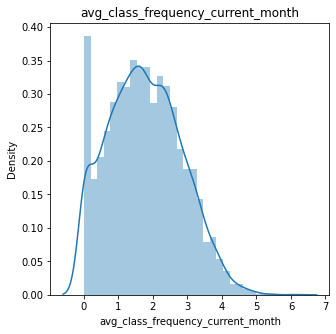

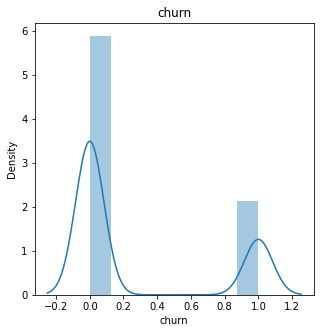

In [12]:
for column in df.columns:
    plt.figure(figsize=(5, 5))
    df.groupby('churn')[column]
    sns.distplot(df[column])
    plt.title(column)
    plt.show()

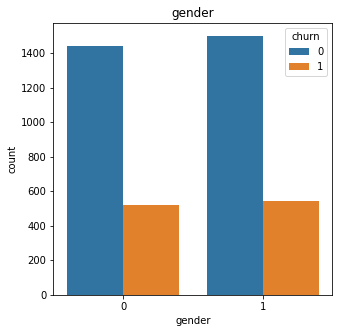

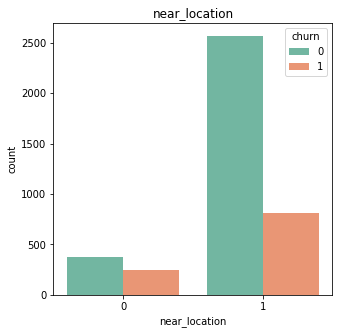

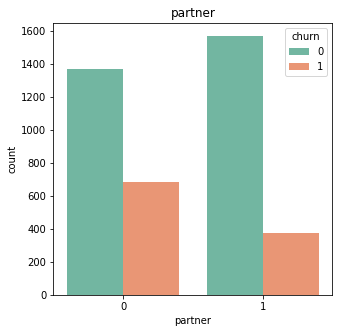

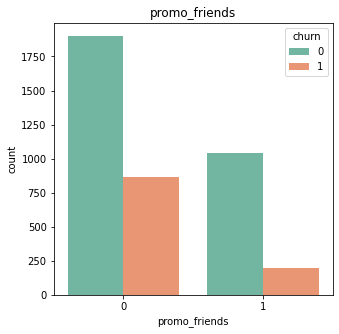

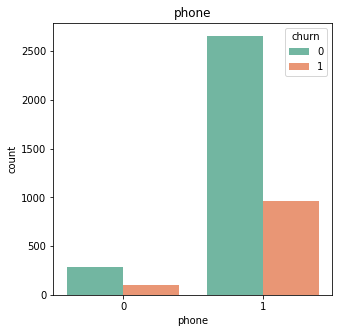

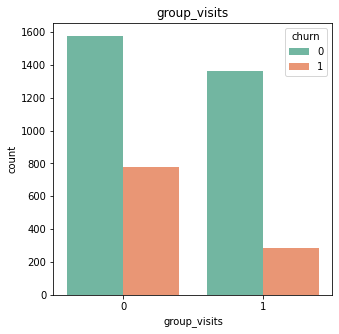

In [13]:
#построим countplot-графики для бинарных признаков
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='churn', data=df)
    sns.set_palette('Set2')
    plt.title(column)
    plt.show()

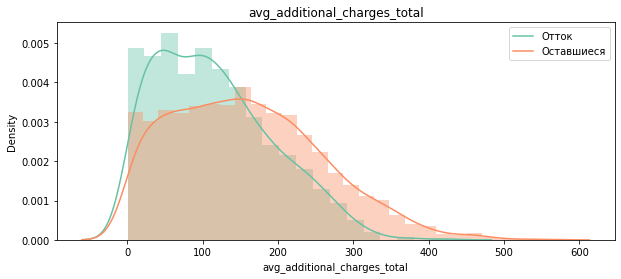

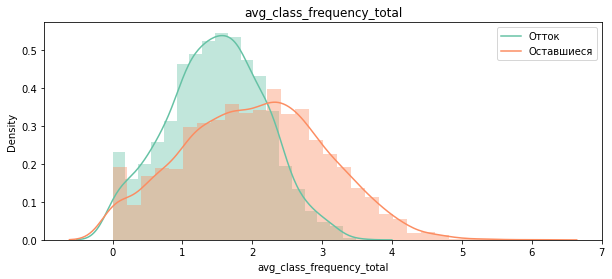

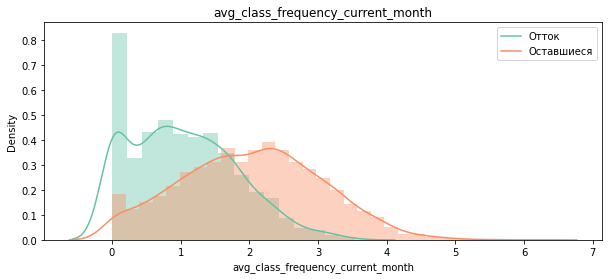

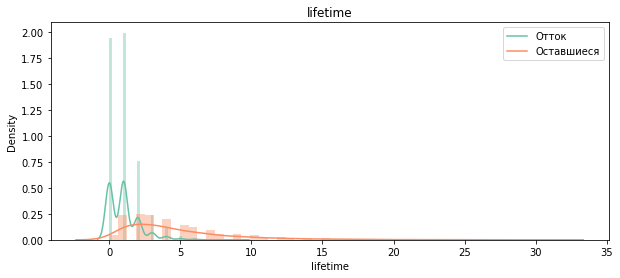

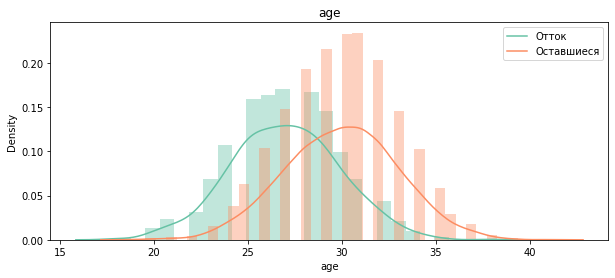

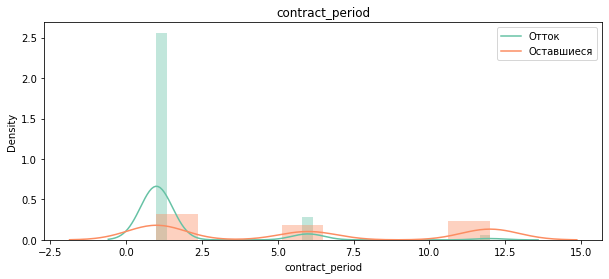

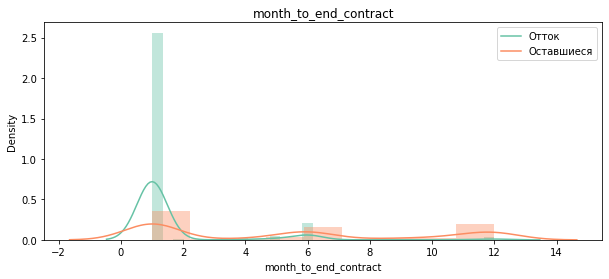

In [14]:
left = df[df['churn']==1]
stayed = df[df['churn']==0]
distplot_columns = ['avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month', 'lifetime', 'age', 
                    'contract_period', 'month_to_end_contract']
for column in distplot_columns: 
  plt.figure(figsize=(10,4)) 
  plt.title(column)
  sns.distplot(left[column])
  sns.distplot(stayed[column])
  plt.legend(['Отток', 'Оставшиеся'])
  plt.show()

#### Построим матрицу корреляций и отобразите её.


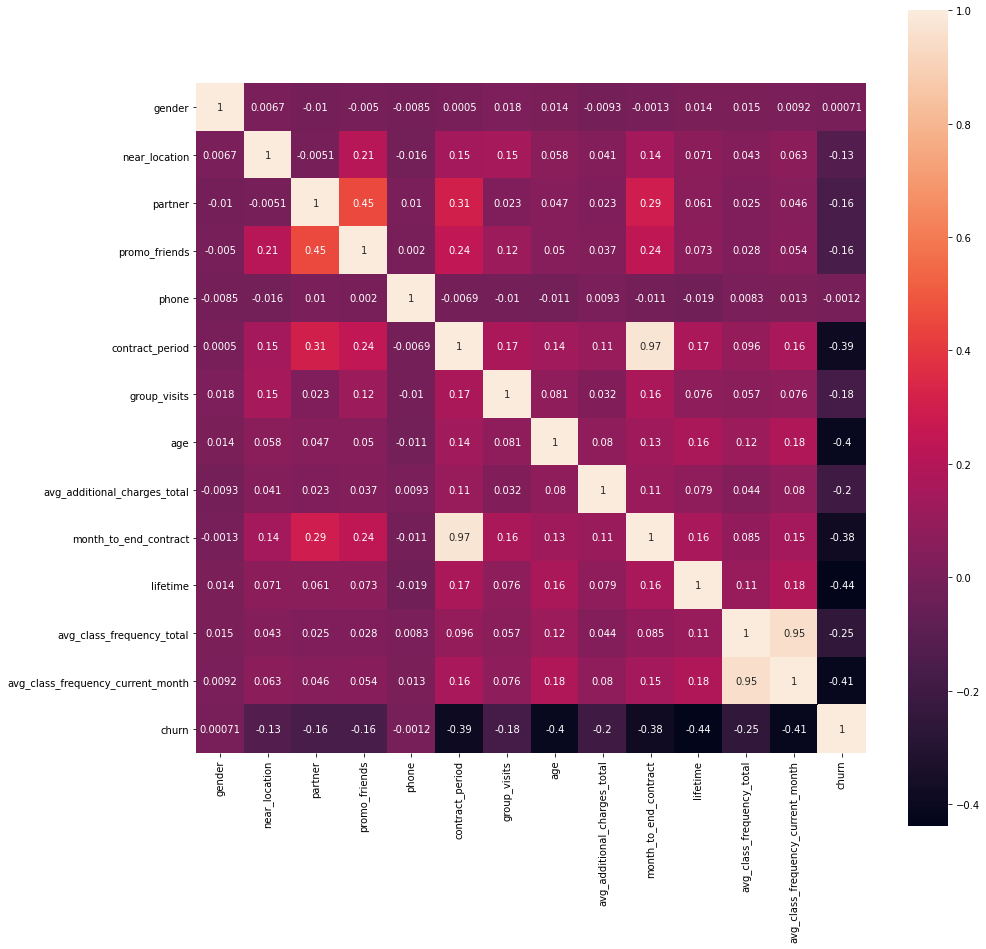

In [15]:
plt.figure(figsize = (15, 15))
cm = df.corr() #вычисляем матрицу корреляций
sns.heatmap(cm, annot=True, square=True) 
plt.show()

Есть мультиколлинеарные признаки - contract_period и month_to_end_contract, avg_class_frequency_current_month и avg_class_frequency_total. Есть признаки с нулевой корреляцией с целевой переменной, это phone и gender, они вообще никак не влияют на отток. Наиболее сильно влияют на отток: время с момента первого обращения в фитнес-центр, количество псещений в месяц, возраст (вот это неожиданная находка), длительность текущего действующего абонемента ну и в конце этого топа наличие скидок по партнерской программе или факт, что клиента пригласил друг.<br>
<br> **Явной зависимости факта оттока от признаков не обнаружено.**<br>


**Вывод**
<br> Средний возраст клиента 29-30 лет и возрастной признак сильно коррелирует с оттоком, в отток попадают более молодые клиенты. <br>
<br>Так же ключевыми переменными являются: время с момента первого обращения в фитнес-центр, количество псещений в месяц, длительность текущего действующего абонемента, наличие скидок по партнерской программе или факт, что клиента пригласил друг. Похоже, что чаще всего в отток попадают клиенты, которые берут пробный абонемент на месяц, редко посещают спорт-зал, не посещают групповые занятия и которым не были предложены скидки по партнерской программе.

### Шаг. Построим модель прогнозирования оттока клиентов

Целевой признак — факт оттока клиента в следующем месяце<br>

- **Разделим данные на обучающую и валидационную выборку функцией train_test_split().**
- **Обучим модель на train-выборке двумя способами:**
<br>**1) логистической регрессией,**
<br>**2) случайным лесом.**
- **Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним модели. Какая модель показала себя лучше на основании метрик?**

In [16]:
X = df.drop('churn', axis = 1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
print('Метрики для модели логистической регрессии:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, lr_predictions),
    precision_score(y_test, lr_predictions),
    recall_score(y_test, lr_predictions)
))

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
print('\nМетрики для модели случайного леса:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, rf_predictions),
    precision_score(y_test, rf_predictions),
    recall_score(y_test, rf_predictions)
))

features = pd.DataFrame(lr_model.coef_.T, X.columns).reset_index()
features.columns = ['feature', 'coef']
features['coef'] = features['coef'].apply(lambda x: abs(x))
features = features.sort_values(by='coef', ascending=False)
print('\nКоэффициенты признаков в оптимальной функции логистической регрессии:')
print(features)

Метрики для модели логистической регрессии:
accuracy_score: 0.92625
precision_score: 0.923469387755102
recall_score:0.8044444444444444

Метрики для модели случайного леса:
accuracy_score: 0.92625
precision_score: 0.8878504672897196
recall_score:0.8444444444444444

Коэффициенты признаков в оптимальной функции логистической регрессии:
                              feature      coef
12  avg_class_frequency_current_month  4.393645
10                           lifetime  3.591381
11          avg_class_frequency_total  3.333778
7                                 age  1.137714
5                     contract_period  0.976108
8        avg_additional_charges_total  0.549172
6                        group_visits  0.473837
3                       promo_friends  0.320317
9               month_to_end_contract  0.242475
1                       near_location  0.060337
4                               phone  0.045304
2                             partner  0.044779
0                              gender  0.

Модель логистической регрессии показала себя лучше. Следовательно, будем использовать её.

### Шаг. Сделайте кластеризацию клиентов

#### Проведем кластеризацию пользователей без столбца целевого значения
  * Стандартизируем данные 
  * Построим матрицу расстояний функцией linkage() на стандартизированной матрице признаков и нарисуем дендограмму. Предположим, какое количество кластеров можем выделить.
  * Обучим модель кластеризации на основе алгоритма K-Means и спрогнозируем кластеры клиентов. (берём n=5 кластеров)

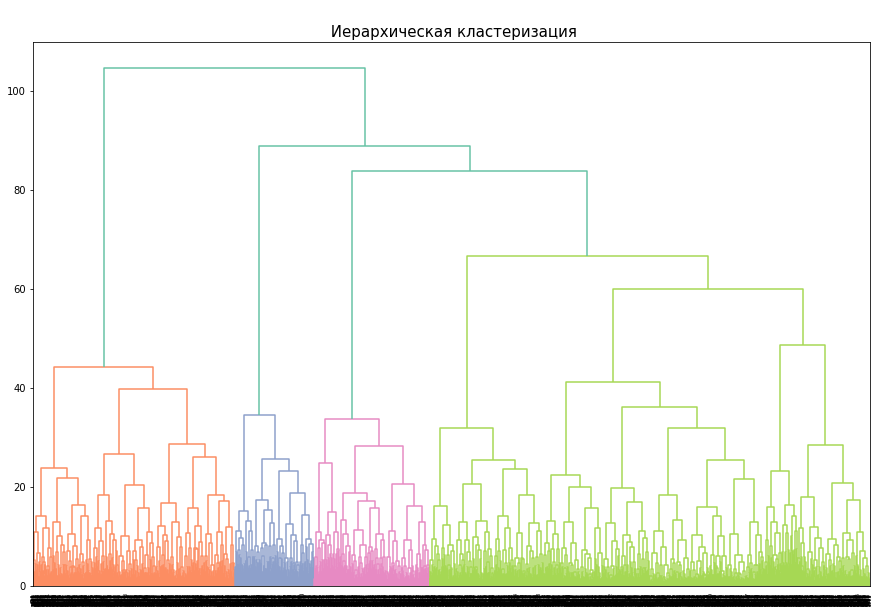

In [18]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_st)
df['cluster_km'] = labels

По Дендрограмме видно, что можно выделить 4, 5 или 6 больших кластеров клиентов (По ТЗ берем 5)

#### Посмотрим на средние значения признаков для кластеров. Можем ли мы что-то заметить по ним?
<br> Для каждого полученного кластера посчитаем долю оттока (groupby). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие - надёжны?

In [20]:
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Вывод:
* **Кластер 0**
  * **Отток - 52% - самый высокий**
  * Живут или работают недалеко от фитнес-центра
  * В основном обладатели недолгосрочных абонементов на 1-3 месяца
  * Наименьшее кол-во посещений за всё время и в последний месяц
* **Кластер 1**
  * Отток - 7%
  * Живут или работают недалеко от фитнес-центра
  * **Чаще всех посещают клуб - 2.81 раз в неделю**
  * Договора НЕ на длительный срок - в  среднем 2.8 месяцев
* **Кластер 2**
  * **Отток - 3% - самый низкий**
  * Живут или работают недалеко от фитнес-центра
  * Преобладают сотрудники компаний-партнеров - 78%
  * Заключают договора **на длительный срок - 12 месяцев**
  * Чаще всех посещают групповые занятия - 54%
  * Чаще всех пришли по промо акции
* **Кластер 3**
  * Отток - 44%
  * Похожи на кластер 0, но живут или **работают в другом районе**
  * Низкий % - 7% пришли по промо акции
  * Реже всех посещают групповые занятия
* **Кластер 4**
  * Отток - 26%
  * Живут или работают недалеко от фитнес-центра
  * **Нет мобильного номера**
  * В среднем 4.5 месяцев контракты


#### Построим распределения признаков для кластеров. Можем ли мы что-то заметить по ним?

In [23]:
outflow_parts = df.query('churn==1').groupby('cluster_km')['churn'].count() / df.query('churn==1')['churn'].count()
outflow_parts  

cluster_km
0    0.026390
1    0.097078
2    0.211122
3    0.611687
4    0.053723
Name: churn, dtype: float64

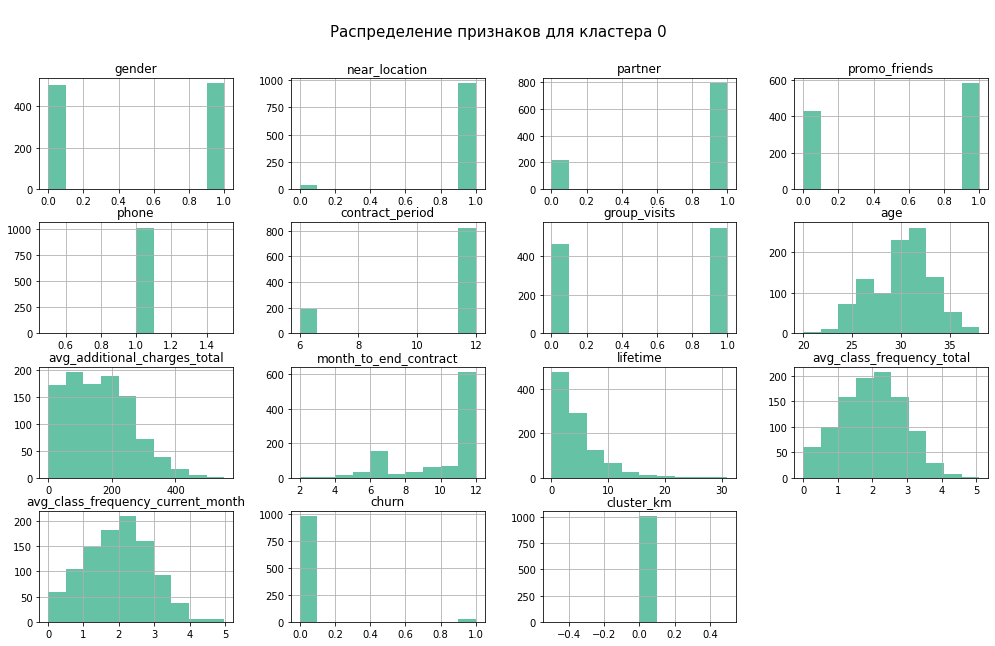

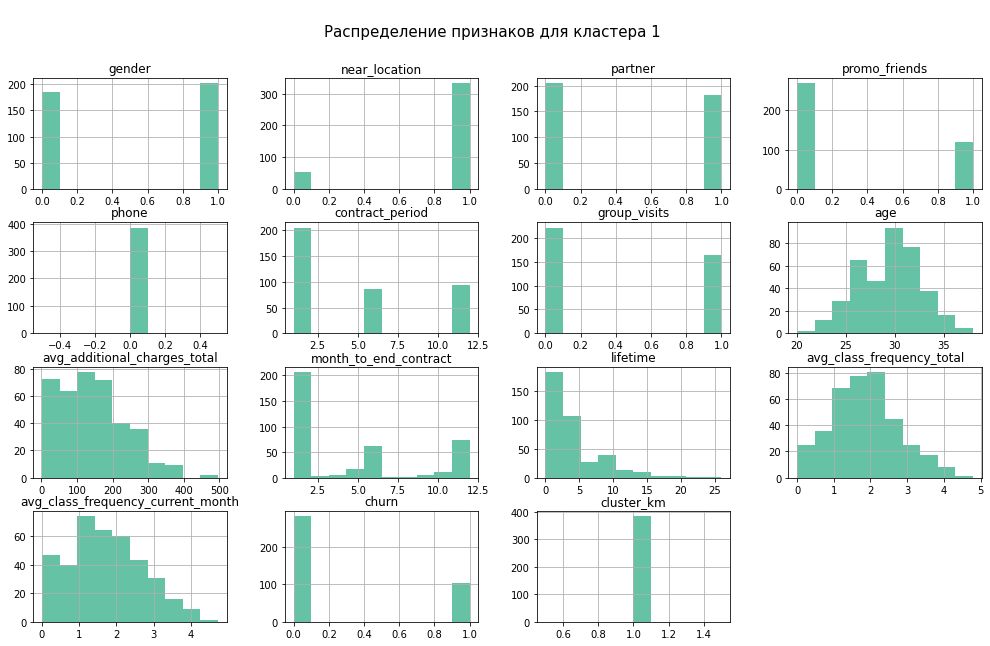

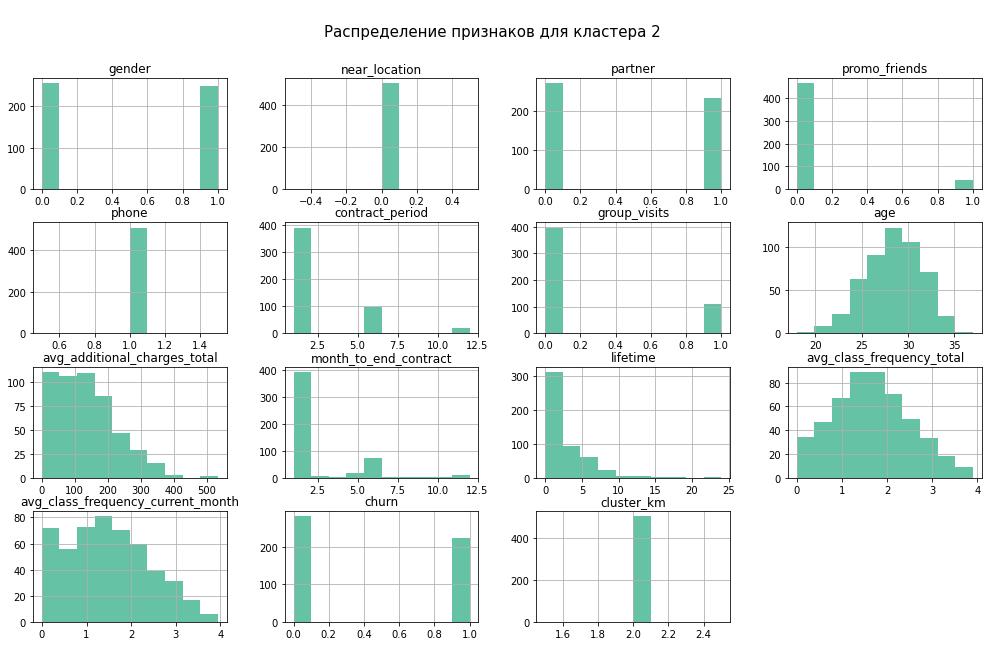

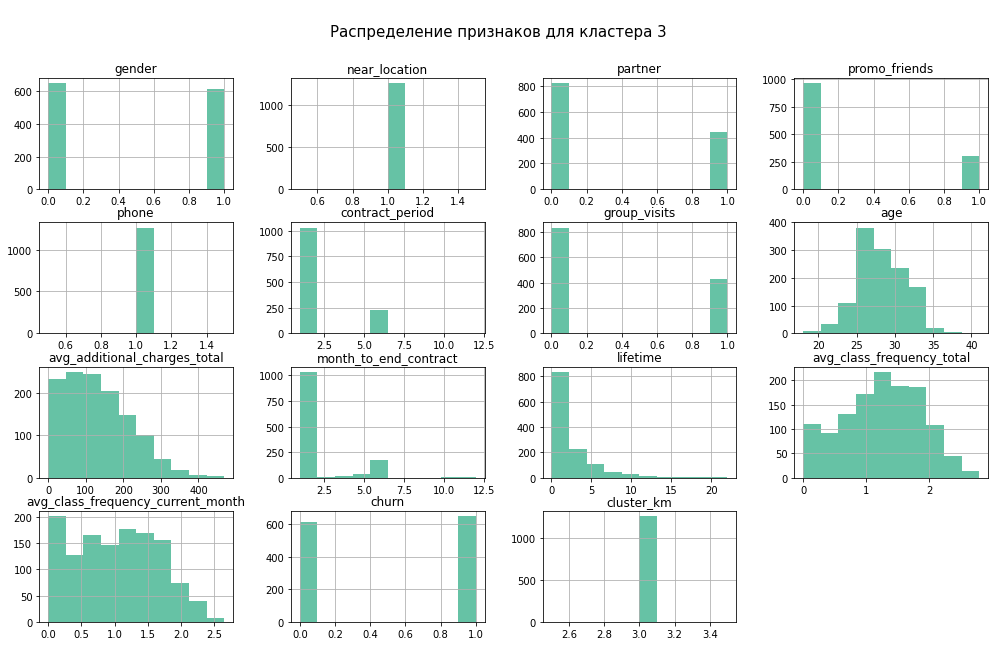

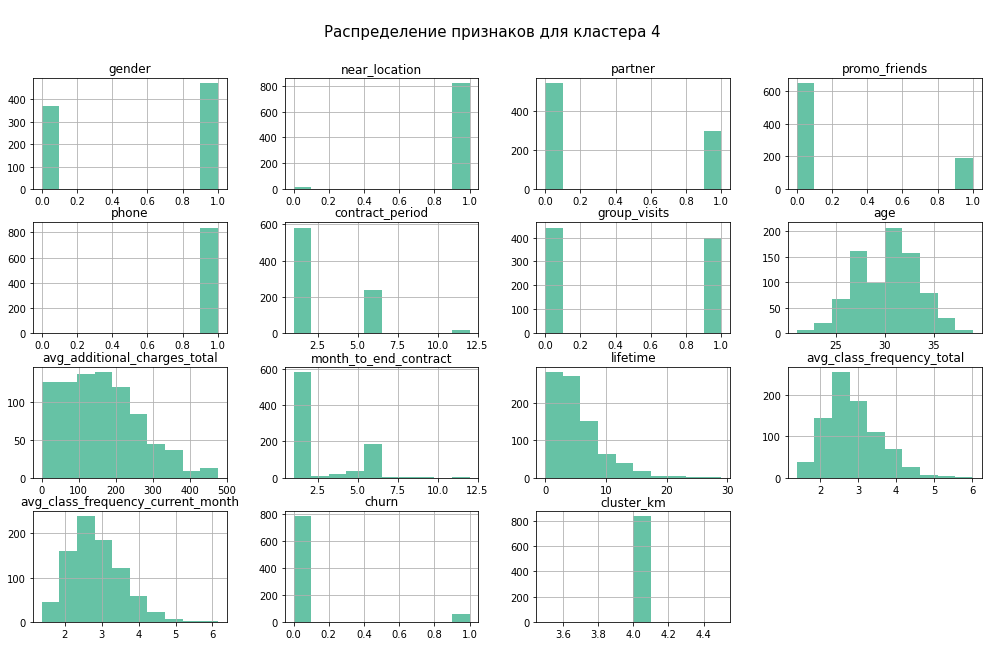

In [22]:
for value in [0, 1, 2, 3, 4]:
  df[df['cluster_km']==value].hist(figsize=(17,10))
  plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
  plt.show()

### Шаг. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

Мы построили пронозную модель с неплохой точностью. Теперь мы можем прогнозировать вероятность оттока по каждому клиенту.
Явных зависимостей факта оттока от одного конкретного признака из рассматриваемых не обнаружено.

**Выводы по имеющимся данным:**
* Распределение по полу примерно одинаково
* Большинство клиентов (85%) живет или работает рядом с фитнес-клубом
* Примерно половина клиентов являются сотрудниками партнерских организаций
* Около 30% клиентов пришли по программе "Приведи друга"
* Известны мобильные номера примерно 90% клиентов
* Средняя длительность абонементов клиентов - 4.6 месяцев
* Около 40% клиентов посещают групповые занятия
* Средний возраст клиентов 29 лет
* Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев
* Средняя частота посещений за все время - 1.87 раз в неделю
* Средняя частота посещений за последний месяц - 1.76 раз в неделю
* **Доля оттока - 27%**

**Выводы на основе отличий признаков у клиентов, попавших в отток и оставшихся:**
* Распределение по полу не отличается
* Ближе живущие или работающие клиенты реже попадают в отток, что вполне логично
* Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты
* Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток
* Наличие мобильного номера клиента не отличается в группах
* Средняя длительность договора полне логично больше у оставшихся пользователей, у большей части клиентов в оттоке срок договора составляет 1 месяц (скорее это говорит о том, что чаще клиенты заключают договор на 1 месяц).
* Оставшиеся пользователи чаще ходят на групповые занятия (хотя возможно, что в отток попали те, кто еще не успел начать ходить на них)
* У групп есть разница в среднем возрасте клиентов
* Есть небольшое различие в выручке от других услуг фитнес-центра
* Оставшееся время до окончания срока действия договора логично больше у оставшихся клиентов.
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

Мы разбили всех наших клиентов на 5 групп.
* Как выяснилось, большинство клиентов живет или работает неподалеку от фитнес-центра.
* **Кластер 0**
  * **Отток - 52% - самый высокий**
  * Живут или работают недалеко от фитнес-центра
  * В основном обладатели недолгосрочных абонементов на 1-3 месяца
  * Наименьшее кол-во посещений за всё время и в последний месяц
* **Кластер 1**
  * Отток - 7%
  * Живут или работают недалеко от фитнес-центра
  * **Чаще всех посещают клуб - 2.81 раз в неделю**
  * Договора НЕ на длительный срок - в  среднем 2.8 месяцев
* **Кластер 2**
  * **Отток - 3% - самый низкий**
  * Живут или работают недалеко от фитнес-центра
  * Преобладают сотрудники компаний-партнеров - 78%
  * Заключают договора **на длительный срок - 12 месяцев**
  * Чаще всех посещают групповые занятия - 54%
  * Чаще всех пришли по промо акции
* **Кластер 3**
  * Отток - 44%
  * Похожи на кластер 0, но живут или **работают в другом районе**
  * Низкий % - 7% пришли по промо акции
  * Реже всех посещают групповые занятия
* **Кластер 4**
  * Отток - 26%
  * Живут или работают недалеко от фитнес-центра
  * **Нет мобильного номера**
  * В среднем 4.5 месяцев контракты

**Рекомендации(самое сложное)**:

* Завлекать клиентов предлагая партнерские программы и промо-акции.
* Завлекать клиентов предлагая более выгодные цены на абонементы за 12 месяцев.
* Предлагать участвовать в групповых занятиях.
* Создавать приятную, притягивающую атмосферу чтобы клиенты ходили чаще 2-3 раза в неделю
* Целевая аудитория :
* * Те кто живет или работает близко,
* * Уделить внимание старшему поколению 30+
* * И меньше тратить ресурсов на тех, кто моложе 30 и живет неблизко.